In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))
import BertModel
import importlib

/home/landreas/delivery/T-AIA/AYAAAAAA/venv/lib64/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = None

In [3]:
importlib.reload(BertModel)

class TrainingGetTripModel(BertModel.BertNERModel):
    def __init__(self):
        super().__init__(["O", "B-VILLE_DEPART", "I-VILLE_DEPART", "B-VILLE_DESTINATION", "I-VILLE_DESTINATION"])

# Refresh the methods of the model if it was already instanciated
if model:
    model.__class__ = TrainingGetTripModel
    TrainingGetTripModel.refresh_methods(model)

In [4]:
model = TrainingGetTripModel()

In [5]:
# Charger le tokenizer et le modèle
model.load_model("camembert-base")

print("Example of data: ", model.validation_data[0])

Some weights of CamembertForTokenClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Map: 100%|██████████| 225/225 [00:00<00:00, 841.58 examples/s]

Example of data:  {'tokens': ['Je', 'suis', 'en', 'vacances', 'à', 'Angoulême,', 'retour', 'prévu', 'à', 'Cognac'], 'ner_tags': [0, 0, 0, 0, 0, 1, 2, 2, 2, 2], 'input_ids': [5, 100, 146, 22, 866, 15, 21, 24136, 7, 665, 1936, 15, 29042, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'labels': [-10

In [6]:
model.train(2)

/home/landreas/delivery/T-AIA/AYAAAAAA/venv/lib64/python3.12/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Map: 100%|██████████| 1004/1004 [00:00<00:00, 5573.69 examples/s]
/home/landreas/delivery/T-AIA/AYAAAAAA/src/nlp/BertModel.py:137: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  self.trainer = Trainer(
  2%|▏         | 10/500 [00:08<07:00,  1.17it/s]

{'loss': 1.2593, 'grad_norm': 1.6943509578704834, 'learning_rate': 4.9e-05, 'epoch': 0.04}


  4%|▍         | 20/500 [00:17<06:50,  1.17it/s]

{'loss': 0.8167, 'grad_norm': 1.0836468935012817, 'learning_rate': 4.8e-05, 'epoch': 0.08}


  6%|▌         | 30/500 [00:25<06:40,  1.17it/s]

{'loss': 0.7102, 'grad_norm': 1.0550614595413208, 'learning_rate': 4.7e-05, 'epoch': 0.12}


  8%|▊         | 40/500 [00:34<06:34,  1.17it/s]

{'loss': 0.6739, 'grad_norm': 1.0803877115249634, 'learning_rate': 4.600000000000001e-05, 'epoch': 0.16}


 10%|█         | 50/500 [00:43<06:25,  1.17it/s]

{'loss': 0.5634, 'grad_norm': 1.2522940635681152, 'learning_rate': 4.5e-05, 'epoch': 0.2}


 12%|█▏        | 60/500 [00:51<06:20,  1.16it/s]

{'loss': 0.4668, 'grad_norm': 1.2031302452087402, 'learning_rate': 4.4000000000000006e-05, 'epoch': 0.24}


 14%|█▍        | 70/500 [01:00<06:14,  1.15it/s]

{'loss': 0.475, 'grad_norm': 1.0476018190383911, 'learning_rate': 4.3e-05, 'epoch': 0.28}


 16%|█▌        | 80/500 [01:09<06:15,  1.12it/s]

{'loss': 0.4324, 'grad_norm': 1.9657325744628906, 'learning_rate': 4.2e-05, 'epoch': 0.32}


 18%|█▊        | 90/500 [01:18<06:11,  1.10it/s]

{'loss': 0.3346, 'grad_norm': 1.0377280712127686, 'learning_rate': 4.1e-05, 'epoch': 0.36}


 20%|██        | 100/500 [01:27<06:03,  1.10it/s]

{'loss': 0.353, 'grad_norm': 1.48292875289917, 'learning_rate': 4e-05, 'epoch': 0.4}


 22%|██▏       | 110/500 [01:36<05:49,  1.12it/s]

{'loss': 0.3031, 'grad_norm': 0.8147584199905396, 'learning_rate': 3.9000000000000006e-05, 'epoch': 0.44}


 24%|██▍       | 120/500 [01:45<05:49,  1.09it/s]

{'loss': 0.3114, 'grad_norm': 1.147605061531067, 'learning_rate': 3.8e-05, 'epoch': 0.48}


 26%|██▌       | 130/500 [01:54<05:34,  1.11it/s]

{'loss': 0.2664, 'grad_norm': 1.14906907081604, 'learning_rate': 3.7e-05, 'epoch': 0.52}


 28%|██▊       | 140/500 [02:03<05:27,  1.10it/s]

{'loss': 0.2414, 'grad_norm': 0.6859616637229919, 'learning_rate': 3.6e-05, 'epoch': 0.56}


 30%|███       | 150/500 [02:12<05:14,  1.11it/s]

{'loss': 0.2342, 'grad_norm': 0.6818963885307312, 'learning_rate': 3.5e-05, 'epoch': 0.6}


 32%|███▏      | 160/500 [02:21<05:17,  1.07it/s]

{'loss': 0.2081, 'grad_norm': 0.6840506792068481, 'learning_rate': 3.4000000000000007e-05, 'epoch': 0.64}


 34%|███▍      | 170/500 [02:30<04:57,  1.11it/s]

{'loss': 0.1969, 'grad_norm': 0.5977754592895508, 'learning_rate': 3.3e-05, 'epoch': 0.68}


 36%|███▌      | 180/500 [02:40<04:57,  1.08it/s]

{'loss': 0.2047, 'grad_norm': 0.5732260942459106, 'learning_rate': 3.2000000000000005e-05, 'epoch': 0.72}


 38%|███▊      | 190/500 [02:49<04:40,  1.10it/s]

{'loss': 0.2042, 'grad_norm': 0.7226592302322388, 'learning_rate': 3.1e-05, 'epoch': 0.76}


 40%|████      | 200/500 [02:58<04:42,  1.06it/s]

{'loss': 0.1837, 'grad_norm': 0.6420896053314209, 'learning_rate': 3e-05, 'epoch': 0.8}


 42%|████▏     | 210/500 [03:07<04:23,  1.10it/s]

{'loss': 0.1688, 'grad_norm': 0.5091787576675415, 'learning_rate': 2.9e-05, 'epoch': 0.84}


 44%|████▍     | 220/500 [03:16<04:15,  1.09it/s]

{'loss': 0.2084, 'grad_norm': 0.7302024960517883, 'learning_rate': 2.8000000000000003e-05, 'epoch': 0.88}


 46%|████▌     | 230/500 [03:26<04:06,  1.10it/s]

{'loss': 0.1654, 'grad_norm': 0.5750933289527893, 'learning_rate': 2.7000000000000002e-05, 'epoch': 0.92}


 48%|████▊     | 240/500 [03:35<03:56,  1.10it/s]

{'loss': 0.1639, 'grad_norm': 0.47393134236335754, 'learning_rate': 2.6000000000000002e-05, 'epoch': 0.96}


 50%|█████     | 250/500 [03:44<03:21,  1.24it/s]

{'loss': 0.1536, 'grad_norm': 1.0573714971542358, 'learning_rate': 2.5e-05, 'epoch': 1.0}


                                                 
 50%|█████     | 250/500 [04:05<03:21,  1.24it/s]

Classification Report:
                   precision    recall  f1-score   support

     VILLE_DEPART       0.99      0.99      0.99      1004
VILLE_DESTINATION       0.98      0.99      0.99       942

        micro avg       0.99      0.99      0.99      1946
        macro avg       0.99      0.99      0.99      1946
     weighted avg       0.99      0.99      0.99      1946

{'eval_loss': 0.13525892794132233, 'eval_precision': 0.9851814001021972, 'eval_recall': 0.9907502569373073, 'eval_f1': 0.9879579810402255, 'eval_runtime': 21.2606, 'eval_samples_per_second': 47.223, 'eval_steps_per_second': 2.963, 'epoch': 1.0}


 52%|█████▏    | 260/500 [04:20<04:55,  1.23s/it]

{'loss': 0.1405, 'grad_norm': 0.48040565848350525, 'learning_rate': 2.4e-05, 'epoch': 1.04}


 54%|█████▍    | 270/500 [04:29<03:29,  1.10it/s]

{'loss': 0.1407, 'grad_norm': 0.5963952541351318, 'learning_rate': 2.3000000000000003e-05, 'epoch': 1.08}


 56%|█████▌    | 280/500 [04:38<03:21,  1.09it/s]

{'loss': 0.1416, 'grad_norm': 0.42824941873550415, 'learning_rate': 2.2000000000000003e-05, 'epoch': 1.12}


 58%|█████▊    | 290/500 [04:47<03:10,  1.10it/s]

{'loss': 0.1307, 'grad_norm': 0.4103172719478607, 'learning_rate': 2.1e-05, 'epoch': 1.16}


 60%|██████    | 300/500 [04:56<03:00,  1.11it/s]

{'loss': 0.1356, 'grad_norm': 0.40260690450668335, 'learning_rate': 2e-05, 'epoch': 1.2}


 62%|██████▏   | 310/500 [05:06<02:55,  1.08it/s]

{'loss': 0.1274, 'grad_norm': 0.4359649419784546, 'learning_rate': 1.9e-05, 'epoch': 1.24}


 64%|██████▍   | 320/500 [05:15<02:41,  1.12it/s]

{'loss': 0.1271, 'grad_norm': 0.4048343300819397, 'learning_rate': 1.8e-05, 'epoch': 1.28}


 66%|██████▌   | 330/500 [05:24<02:33,  1.10it/s]

{'loss': 0.1178, 'grad_norm': 0.38415858149528503, 'learning_rate': 1.7000000000000003e-05, 'epoch': 1.32}


 68%|██████▊   | 340/500 [05:33<02:25,  1.10it/s]

{'loss': 0.115, 'grad_norm': 0.3885110318660736, 'learning_rate': 1.6000000000000003e-05, 'epoch': 1.36}


 70%|███████   | 350/500 [05:42<02:17,  1.09it/s]

{'loss': 0.1148, 'grad_norm': 0.7928593158721924, 'learning_rate': 1.5e-05, 'epoch': 1.4}


 72%|███████▏  | 360/500 [05:52<02:11,  1.07it/s]

{'loss': 0.1205, 'grad_norm': 0.3696970045566559, 'learning_rate': 1.4000000000000001e-05, 'epoch': 1.44}


 74%|███████▍  | 370/500 [06:01<02:00,  1.08it/s]

{'loss': 0.11, 'grad_norm': 0.3600643277168274, 'learning_rate': 1.3000000000000001e-05, 'epoch': 1.48}


 76%|███████▌  | 380/500 [06:10<01:51,  1.07it/s]

{'loss': 0.1175, 'grad_norm': 0.3600445091724396, 'learning_rate': 1.2e-05, 'epoch': 1.52}


 78%|███████▊  | 390/500 [06:19<01:43,  1.06it/s]

{'loss': 0.1178, 'grad_norm': 0.3088994324207306, 'learning_rate': 1.1000000000000001e-05, 'epoch': 1.56}


 80%|████████  | 400/500 [06:29<01:33,  1.07it/s]

{'loss': 0.1124, 'grad_norm': 0.3469454348087311, 'learning_rate': 1e-05, 'epoch': 1.6}


 82%|████████▏ | 410/500 [06:38<01:22,  1.10it/s]

{'loss': 0.1036, 'grad_norm': 0.36038005352020264, 'learning_rate': 9e-06, 'epoch': 1.64}


 84%|████████▍ | 420/500 [06:47<01:14,  1.08it/s]

{'loss': 0.103, 'grad_norm': 0.47368374466896057, 'learning_rate': 8.000000000000001e-06, 'epoch': 1.68}


 86%|████████▌ | 430/500 [06:56<01:04,  1.08it/s]

{'loss': 0.1036, 'grad_norm': 0.34511420130729675, 'learning_rate': 7.000000000000001e-06, 'epoch': 1.72}


 88%|████████▊ | 440/500 [07:06<00:55,  1.08it/s]

{'loss': 0.1024, 'grad_norm': 0.3401665985584259, 'learning_rate': 6e-06, 'epoch': 1.76}


 90%|█████████ | 450/500 [07:15<00:47,  1.06it/s]

{'loss': 0.0985, 'grad_norm': 0.3365480601787567, 'learning_rate': 5e-06, 'epoch': 1.8}


 92%|█████████▏| 460/500 [07:24<00:37,  1.07it/s]

{'loss': 0.1095, 'grad_norm': 2.430245876312256, 'learning_rate': 4.000000000000001e-06, 'epoch': 1.84}


 94%|█████████▍| 470/500 [07:34<00:27,  1.11it/s]

{'loss': 0.0967, 'grad_norm': 0.3924274742603302, 'learning_rate': 3e-06, 'epoch': 1.88}


 96%|█████████▌| 480/500 [07:43<00:18,  1.07it/s]

{'loss': 0.1024, 'grad_norm': 0.33390524983406067, 'learning_rate': 2.0000000000000003e-06, 'epoch': 1.92}


 98%|█████████▊| 490/500 [07:52<00:09,  1.08it/s]

{'loss': 0.1106, 'grad_norm': 0.3219083845615387, 'learning_rate': 1.0000000000000002e-06, 'epoch': 1.96}


100%|██████████| 500/500 [08:01<00:00,  1.20it/s]

{'loss': 0.103, 'grad_norm': 0.3264535069465637, 'learning_rate': 0.0, 'epoch': 2.0}


                                                 
100%|██████████| 500/500 [08:29<00:00,  1.20it/s]

Classification Report:
                   precision    recall  f1-score   support

     VILLE_DEPART       0.99      1.00      0.99      1004
VILLE_DESTINATION       0.99      0.99      0.99       942

        micro avg       0.99      0.99      0.99      1946
        macro avg       0.99      0.99      0.99      1946
     weighted avg       0.99      0.99      0.99      1946

{'eval_loss': 0.09320121258497238, 'eval_precision': 0.9877300613496932, 'eval_recall': 0.9928057553956835, 'eval_f1': 0.9902614044079959, 'eval_runtime': 20.8134, 'eval_samples_per_second': 48.238, 'eval_steps_per_second': 3.027, 'epoch': 2.0}


100%|██████████| 500/500 [08:38<00:00,  1.04s/it]

{'train_runtime': 518.0581, 'train_samples_per_second': 15.419, 'train_steps_per_second': 0.965, 'train_loss': 0.24404011392593383, 'epoch': 2.0}


100%|██████████| 63/63 [00:19<00:00,  3.17it/s]

Classification Report:
                   precision    recall  f1-score   support

     VILLE_DEPART       0.99      1.00      0.99      1004
VILLE_DESTINATION       0.99      0.99      0.99       942

        micro avg       0.99      0.99      0.99      1946
        macro avg       0.99      0.99      0.99      1946
     weighted avg       0.99      0.99      0.99      1946



Classification Report:
                   precision    recall  f1-score   support

     VILLE_DEPART       0.99      1.00      0.99      1004
VILLE_DESTINATION       0.99      0.99      0.99       942

        micro avg       0.99      0.99      0.99      1946
        macro avg       0.99      0.99      0.99      1946
     weighted avg       0.99      0.99      0.99      1946



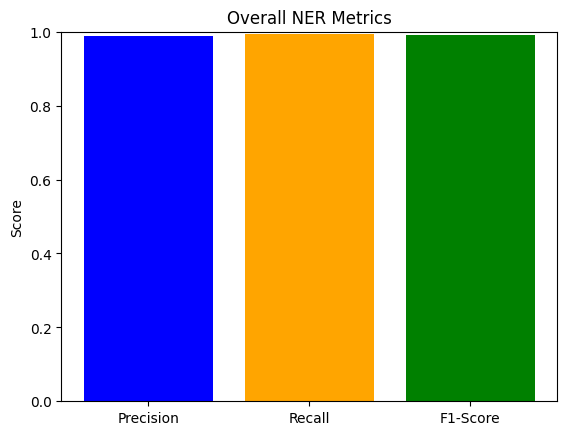

B-VILLE_DEPART: Precision=0.99, Recall=1.00, F1=0.99
I-VILLE_DEPART: Precision=1.00, Recall=0.98, F1=0.99
B-VILLE_DESTINATION: Precision=0.99, Recall=0.99, F1=0.99
I-VILLE_DESTINATION: Precision=0.96, Recall=0.97, F1=0.96


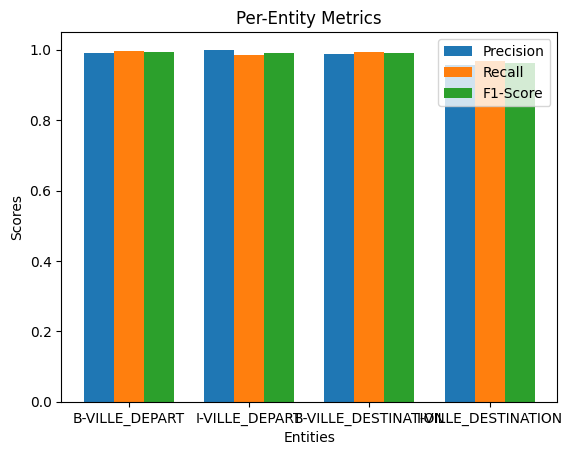

100%|██████████| 15/15 [00:04<00:00,  3.63it/s]


Classification Report:
                   precision    recall  f1-score   support

     VILLE_DEPART       0.91      0.95      0.93       223
VILLE_DESTINATION       0.76      0.70      0.73        23

        micro avg       0.90      0.93      0.91       246
        macro avg       0.84      0.82      0.83       246
     weighted avg       0.90      0.93      0.91       246

Classification Report:
                   precision    recall  f1-score   support

     VILLE_DEPART       0.91      0.95      0.93       223
VILLE_DESTINATION       0.76      0.70      0.73        23

        micro avg       0.90      0.93      0.91       246
        macro avg       0.84      0.82      0.83       246
     weighted avg       0.90      0.93      0.91       246



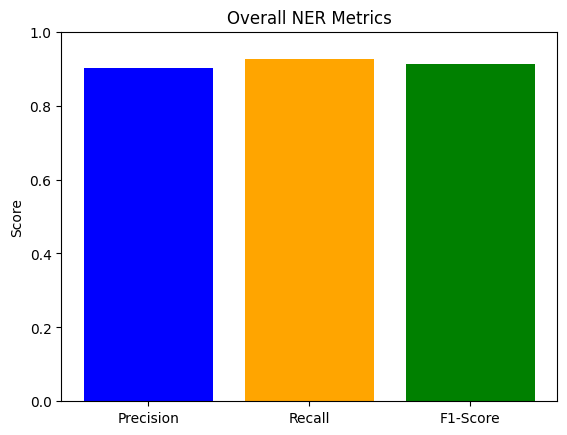

B-VILLE_DEPART: Precision=1.00, Recall=1.00, F1=1.00
I-VILLE_DEPART: Precision=0.95, Recall=0.96, F1=0.95
B-VILLE_DESTINATION: Precision=0.76, Recall=0.70, F1=0.73
I-VILLE_DESTINATION: Precision=1.00, Recall=0.50, F1=0.67


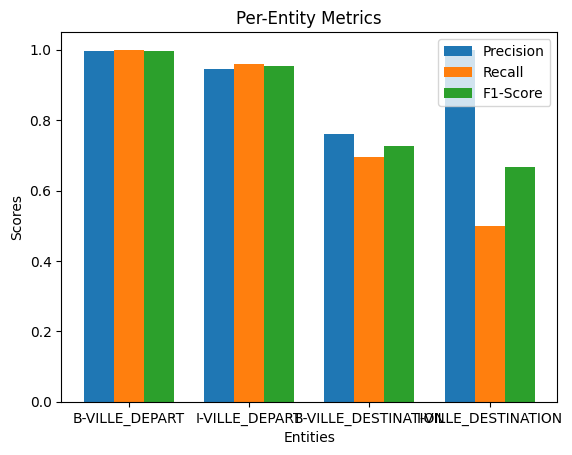

In [7]:
model.evaluate_model(model.test_data)
model.evaluate_model(model.validation_data)